In [375]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import cross_val_score


In [376]:
bike_data = pd.read_csv('/Users/esrasaydam/Documents/Springboard/GitHub/Capstone Project #2/day.csv')

In [377]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [378]:
# let's make some numbers categorical...
bike_data['yr'] = bike_data.yr.astype('category')
bike_data['season'] = bike_data.season.astype('category')
bike_data['mnth'] = bike_data.mnth.astype('category')
bike_data['holiday'] = bike_data.holiday.astype('category')
bike_data['weekday'] = bike_data.weekday.astype('category')
bike_data['workingday'] = bike_data.workingday.astype('category')
bike_data['weathersit'] = bike_data.weathersit.astype('category')


In [379]:
#Create dummy or indicator features for categorical variables
df1 = bike_data.copy()

df1 = pd.get_dummies(df1,
                     columns = ['season', 'weathersit', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday'])
display(df1)


,instant,dteday,temp,atemp,hum,windspeed,casual,registered,cnt,season_1,...,holiday_1,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1
0,1,2011-01-01,0.344167,0.363625,0.805833,0.160446,331,654,985,1,...,0,0,0,0,0,0,0,1,1,0
1,2,2011-01-02,0.363478,0.353739,0.696087,0.248539,131,670,801,1,...,0,1,0,0,0,0,0,0,1,0
2,3,2011-01-03,0.196364,0.189405,0.437273,0.248309,120,1229,1349,1,...,0,0,1,0,0,0,0,0,0,1
3,4,2011-01-04,0.200000,0.212122,0.590435,0.160296,108,1454,1562,1,...,0,0,0,1,0,0,0,0,0,1
4,5,2011-01-05,0.226957,0.229270,0.436957,0.186900,82,1518,1600,1,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,0.254167,0.226642,0.652917,0.350133,247,1867,2114,1,...,0,0,0,0,0,1,0,0,0,1
727,728,2012-12-28,0.253333,0.255046,0.590000,0.155471,644,2451,3095,1,...,0,0,0,0,0,0,1,0,0,1
728,729,2012-12-29,0.253333,0.242400,0.752917,0.124383,159,1182,1341,1,...,0,0,0,0,0,0,0,1,1,0
729,730,2012-12-30,0.255833,0.231700,0.483333,0.350754,364,1432,1796,1,...,0,1,0,0,0,0,0,0,1,0


In [380]:
#let's make sure of the feature types.
bike_data.dtypes

instant          int64
dteday          object
season        category
yr            category
mnth          category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

In [381]:
# Standardize the magnitude of numeric features using a scaler
#drop the 'dteday' column which is an object and also 'registered', 'casual' and 'atemp' to simplify the numbers
df1.drop(['dteday', 'registered', 'casual', 'atemp', 'instant'],  axis=1, inplace=True)
df1.head()


,temp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,...,holiday_1,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1
0,0.344167,0.805833,0.160446,985,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
1,0.363478,0.696087,0.248539,801,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,0.196364,0.437273,0.248309,1349,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3,0.200000,0.590435,0.160296,1562,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,0.226957,0.436957,0.186900,1600,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [382]:
# Making a Scaler object
scaler = StandardScaler()
# Fitting data to the scaler object
scaled_df = scaler.fit_transform(df1)
scaled_df = pd.DataFrame(scaled_df, columns= df1.columns)
scaled_df.columns

Index(['temp', 'hum', 'windspeed', 'cnt', 'season_1', 'season_2', 'season_3',
       'season_4', 'weathersit_1', 'weathersit_2', 'weathersit_3', 'season_1',
       'season_2', 'season_3', 'season_4', 'yr_0', 'yr_1', 'mnth_1', 'mnth_2',
       'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9',
       'mnth_10', 'mnth_11', 'mnth_12', 'holiday_0', 'holiday_1', 'weekday_0',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'workingday_0', 'workingday_1'],
      dtype='object')

In [383]:
#Split into testing and training datasets 
X_train, X_test, y_train, y_test = train_test_split(scaled_df.drop(columns='cnt'), 
                                                 scaled_df.cnt, test_size=0.3, 
                                                    random_state=47)



In [384]:
# in case I want to scale after train_test splitting.
#sc = StandardScaler()
#X_train_std = sc.fit_transform(X_train)
#X_test_std = sc.transform(X_test)

MODELING for Philadelphia branch of Capital Branch

In [385]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score


Models to try
1 - Linear Regression model
2 - Elastic Net
3 - Random Forest Regression
4 - Gradient Boosting
5 - Decision Tree
6- Extra Tree Regressor
7 - Bagging Regressor
8- Ada Boost Regressor
9- Huber Regressor

In [386]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNetCV
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import AdaBoostRegressor
from sklearn import model_selection
from sklearn.linear_model import HuberRegressor, LinearRegression
from sklearn.model_selection import train_test_split
from datetime import datetime as dt
from scipy.stats import loguniform



In [387]:


models = [LinearRegression(),
          AdaBoostRegressor(),
          Ridge(),
          HuberRegressor(),
          ElasticNetCV(),
          DecisionTreeRegressor(), 
          ExtraTreesRegressor(),
          GradientBoostingRegressor(),
          RandomForestRegressor(),
          BaggingRegressor()]


# A function is wrtten to find out the cross validation score based on mean absolute error

def compare_models(model):
    #also counting running time
    start_time = dt.now()
    kfold = model_selection.KFold(n_splits=10)
    mean_dev_scores = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_absolute_error')
    r2_scores = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
    Scores= pd.DataFrame({'Mean deviation':[np.mean(mean_dev_scores)],'R Square':[np.mean(r2_scores)]})
    print(Scores)
    end_time = dt.now()
    print('Running time: {}'.format(end_time - start_time))

for model in models:
    compare_models(model)

   Mean deviation  R Square
0        -0.31204  0.800167
Running time: 0:00:00.052029
   Mean deviation  R Square
0       -0.352451  0.783993
Running time: 0:00:00.992677
   Mean deviation  R Square
0       -0.307888  0.805291
Running time: 0:00:00.035804
   Mean deviation  R Square
0       -0.303075  0.807278
Running time: 0:00:00.388360
   Mean deviation  R Square
0       -0.309876  0.806196
Running time: 0:00:00.848368
   Mean deviation  R Square
0       -0.362403  0.706503
Running time: 0:00:00.076149
   Mean deviation  R Square
0       -0.270486  0.844621
Running time: 0:00:03.179094
   Mean deviation  R Square
0        -0.25237  0.868427
Running time: 0:00:01.136645
   Mean deviation  R Square
0       -0.258969  0.852638
Running time: 0:00:03.639564
   Mean deviation  R Square
0       -0.269225  0.832912
Running time: 0:00:00.442731


###### GradientBoostingRegressor() is the model with the highest R score of 0.87547.
The second best would be BaggingRegressor() with 0.82945 of score because of its fast running time.RandomForestRegressor() has also the score above 0.85 but its running times are over 3 seconds!

In [388]:
# Hyperparameters for GradientBoostingRegressor
#
gbr_params = {'n_estimators': 1000,
          'max_depth': 3,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'squared_error'}
#
# Create an instance of gradient boosting regressor
#
gbr = GradientBoostingRegressor(**gbr_params)
#
# Fit the model
#
gbr.fit(X_train, y_train)
#
# Print Coefficient of determination R^2
#
print("Model Accuracy: %.3f" % gbr.score(X_test, y_test))
#
# Create the mean squared error
#
mse = mean_squared_error(y_test, gbr.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

Model Accuracy: 0.906
The mean squared error (MSE) on test set: 0.0927


In [389]:
X_train.columns

Index(['temp', 'hum', 'windspeed', 'season_1', 'season_2', 'season_3',
       'season_4', 'weathersit_1', 'weathersit_2', 'weathersit_3', 'season_1',
       'season_2', 'season_3', 'season_4', 'yr_0', 'yr_1', 'mnth_1', 'mnth_2',
       'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9',
       'mnth_10', 'mnth_11', 'mnth_12', 'holiday_0', 'holiday_1', 'weekday_0',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'workingday_0', 'workingday_1'],
      dtype='object')

Gradient Boosting calculates feature attributes differently than Random Forest so here is the code for it.

In [390]:
def feature_importances_(self):   
    total_sum = np.zeros((self.n_features, ), dtype=np.float64)
    for stage in self.estimators_:
        stage_sum = sum(tree.feature_importances_
                        for tree in stage) / len(stage)
        total_sum += stage_sum

    importances = total_sum / len(self.estimators_)
    return importances

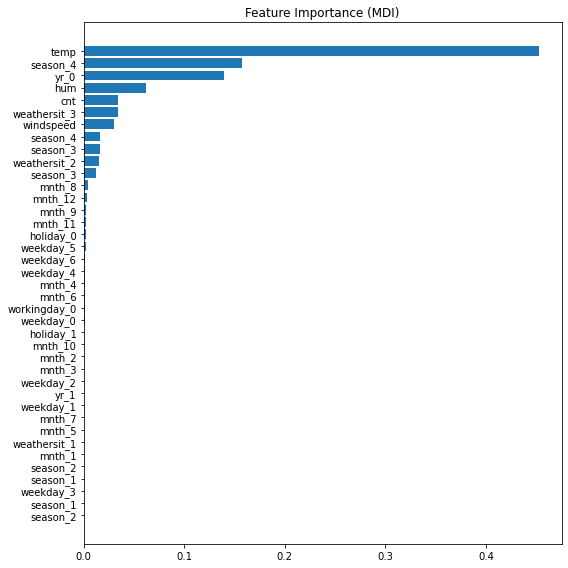

In [391]:
from sklearn.inspection import permutation_importance
#
# Now let's determine feature importace
#
feature_importance = gbr.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(8, 8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(scaled_df.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')
result = permutation_importance(gbr, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
fig.tight_layout()
plt.show()

We can conclude that temperature, seasons (especially if it's winter or fall), windspeed 
and weather situation (especially if it's cloudy or rainy are important features.)

The average humidity in Philadelphia annually is 0.67
The average temperature in Philadelphia is 13.1 C meaning 0.483(AKA  - The lowest is -3.3 C and the highest is 30.6 C)
SOURCE: https://weatherspark.com/y/22721/Average-Weather-in-Philadelphia-Pennsylvania-United-States-Year-Round#:~:text=In%20Philadelphia%2C%20the%20summers%20are,or%20above%2094%C2%B0F.

The number of days with precipitation in Phily is 119 days
https://www.bestplaces.net/climate/city/pennsylvania/philadelphia

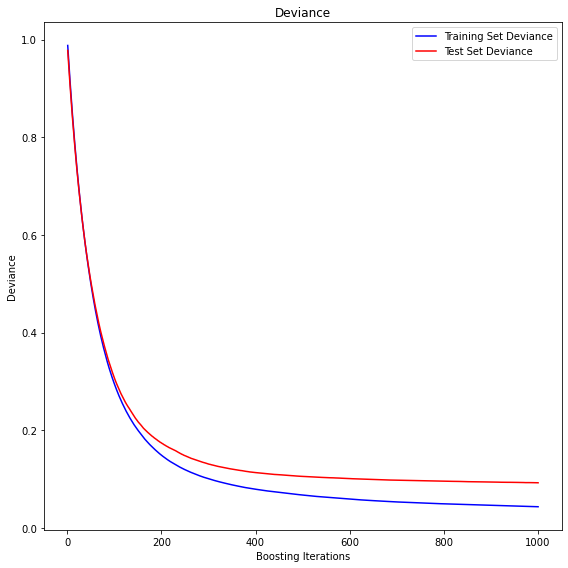

In [392]:
test_score = np.zeros((gbr_params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(gbr.staged_predict(X_test)):
    test_score[i] = gbr.loss_(y_test, y_pred)
 
fig = plt.figure(figsize=(8, 8))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(gbr_params['n_estimators']) + 1, gbr.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(gbr_params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

In [393]:
df1.head()

,temp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,...,holiday_1,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1
0,0.344167,0.805833,0.160446,985,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
1,0.363478,0.696087,0.248539,801,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,0.196364,0.437273,0.248309,1349,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3,0.200000,0.590435,0.160296,1562,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,0.226957,0.436957,0.186900,1600,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [394]:
#adding philadelphia column to the new dataframe and subtracting seasons since temp and weather situation might have similar importances.
scaled_df.columns

Index(['temp', 'hum', 'windspeed', 'cnt', 'season_1', 'season_2', 'season_3',
       'season_4', 'weathersit_1', 'weathersit_2', 'weathersit_3', 'season_1',
       'season_2', 'season_3', 'season_4', 'yr_0', 'yr_1', 'mnth_1', 'mnth_2',
       'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9',
       'mnth_10', 'mnth_11', 'mnth_12', 'holiday_0', 'holiday_1', 'weekday_0',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'workingday_0', 'workingday_1'],
      dtype='object')

In [395]:
X_columns = [col for col in X_train.columns]


In [396]:
# Predict the count for January 1st in Philly by using January 1st column of 2010
X_ph = scaled_df.loc[df1.cnt == 985, X_columns]
y_ph = scaled_df.loc[df1.cnt == 985, 'cnt']
X_ph

,temp,hum,windspeed,season_1,season_1,season_2,season_2,season_3,season_3,season_4,...,holiday_1,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1
0,-0.826662,1.250171,-0.387892,1.743179,1.743179,-0.579983,-0.579983,-0.588409,-0.588409,-0.567345,...,-0.171981,-0.409551,-0.409551,-0.40727,-0.40727,-0.40727,-0.40727,2.441701,1.471225,-1.471225


In [397]:
#Code task 2#
#In this function, copy the Philadelphia data into a new data frame
#(Note we use .copy()!)
#And then for each feature, and each of its deltas (changes from the original),
#create the modified scenario dataframe (p_df) and make a bike count prediction
#for it. The difference between the scenario's prediction and the current
#prediction is then calculated and returned.
#Complete the code to increment each feature by the associated delta
def predict_increase(features, deltas):
    """Increase in modelled ticket price by applying delta to feature.
    
    Arguments:
    features - list, names of the features in the bike_data with philly column dataframe to change
    deltas - list, the amounts by which to increase the values of the features
    
    Outputs:
    Amount of increase in the predicted ticket price
    """
    
    p_df = X_ph.copy()
    for f, d in zip(features, deltas):
        p_df[features] += deltas
    return gbr.predict(p_df).item() - gbr.predict(X_ph).item()

In [398]:
# average temp, hum, and windspeed in Philly were successively 0.50, 0.0, 0.123
##source: https://en.climate-data.org/north-america/united-states-of-america/pennsylvania/philadelphia-1690/t/january-1/
phily_cnt = predict_increase(['temp', 'hum', 'windspeed'], [0.16, - 0.8, 0.037])


/Users/esrasaydam/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: X has 47 features, but GradientBoostingRegressor is expecting 39 features as input.

ARIMA MODEL TRYING

<AxesSubplot:>

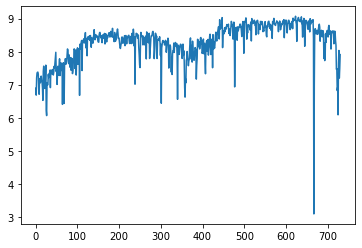

In [399]:
#making a plot by looking at the bike rental count only
df2 = np.log(df1.cnt) 

df2.plot()

In [400]:
#splitting the dataset into train and test data by going back 30 days
msk = (df2.index < len(df2)-30)
df2_train = df2[msk].copy()
df2_test = df2[~msk].copy()

In [407]:
from statsmodels.tsa.stattools import adfuller

# proving that our data is non-stationary
adf_test = adfuller(df2_train)
print(f'p-value: {adf_test[1]}')

p-value: 0.08097182231451261


<AxesSubplot:>

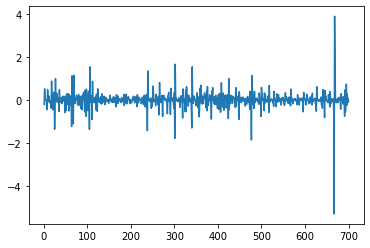

In [409]:

df2_train_diff = df2_train.diff().dropna()
df2_train_diff.plot()

It looks to be more stationary now.

let's look at ACF and PACF of first difference timeseries

/Users/esrasaydam/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


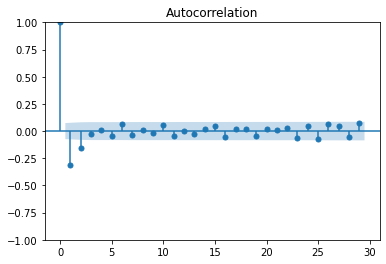

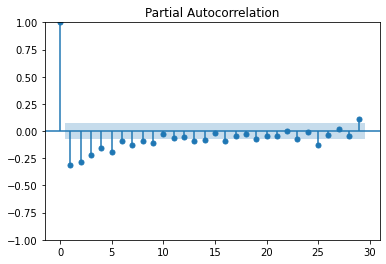

In [410]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_diff = plot_acf(df2_train_diff)

pacf_diff = plot_pacf(df2_train_diff)

PACF has a gradual decrease so we will go with ACF that has a spike at 1 and 2. So we can go with lag 2.

In [411]:
adf_test2 = adfuller(df2_train_diff)
print(f'p-value: {adf_test2[1]}')

p-value: 2.5381099011721767e-19


This is very close to zero.

We will use ARIMA model (0,1,2). Let's fit the model.

In [413]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df2_train, order=(0,1,2))
model_fit = model.fit()
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                    cnt   No. Observations:                  701
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -250.051
Date:                Thu, 13 Jul 2023   AIC                            506.102
Time:                        18:03:41   BIC                            519.755
Sample:                             0   HQIC                           511.380
                                - 701                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6210      0.034    -18.006      0.000      -0.689      -0.553
ma.L2         -0.2618      0.037     -7.017      0.000      -0.335      -0.189
sigma2         0.1194      0.001    103.620      0.0

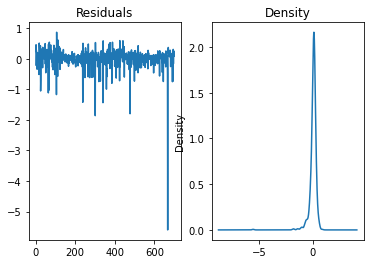

/Users/esrasaydam/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


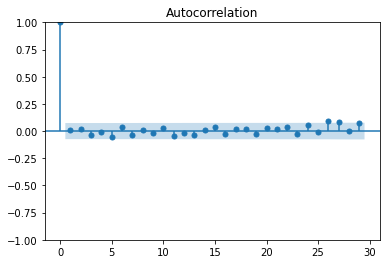

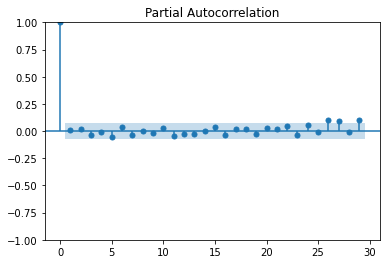

In [415]:
#making sure our timeseries captured enough data
import matplotlib.pyplot as plt
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()



In [424]:
Residuals look random (like white noise) so this is good model!

SyntaxError: invalid syntax (344499047.py, line 1)

/Users/esrasaydam/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


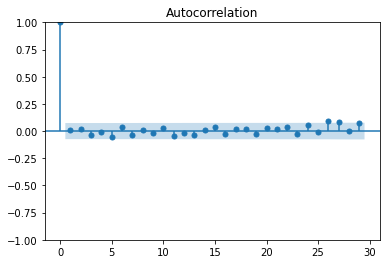

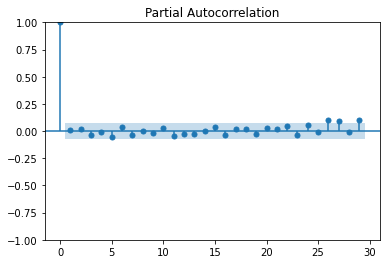

In [416]:
acf_res = plot_acf(residuals)

pacf_res = plot_pacf(residuals)

ACF and PACF tell the same thing. Let's forecast!


In [430]:
forecast_test = model_fit.forecast(len(df2_test))
forecast_test

701    8.449946
702    8.429306
703    8.429306
704    8.429306
705    8.429306
706    8.429306
707    8.429306
708    8.429306
709    8.429306
710    8.429306
711    8.429306
712    8.429306
713    8.429306
714    8.429306
715    8.429306
716    8.429306
717    8.429306
718    8.429306
719    8.429306
720    8.429306
721    8.429306
722    8.429306
723    8.429306
724    8.429306
725    8.429306
726    8.429306
727    8.429306
728    8.429306
729    8.429306
730    8.429306
Name: predicted_mean, dtype: float64

In [428]:
df2['forecast_manual'] = [None]*len(df2_train) + list(forecast_test)


TypeError: no numeric data to plot

In [422]:
df2.head()

0    6.892642
1    6.685861
2    7.207119
3    7.353722
4    7.377759
Name: cnt, dtype: object